In [1]:
# 18222757 Maciej Augustynek ,18244327 Bartlomiej Skorecki
# Code executes till the end without errors
# Original source : https://www.kaggle.com/esraamohamedahmed/classification-of-butterflies-images

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd
import os
from tensorflow.keras.metrics import Precision , Recall

In [3]:
import cv2
path='./images/'
file=os.listdir('./images/')
features=[] #to store images
labels=[] #to store labels
for img in file:
    # label=int(img) 
    label=int(img[:3]) #extracts label from the image file name
    labels.append(label) #adds the found label to the list of labels
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
    #Resizes images into the size 220x220
    img_array=cv2.resize(img_array,(220,220))
    #stores images in the array
    features.append(img_array)

In [4]:
import os
descrid_path='./descriptions'
descrid=os.listdir('./descriptions')
descrid

['001.txt',
 '002.txt',
 '003.txt',
 '004.txt',
 '005.txt',
 '006.txt',
 '007.txt',
 '008.txt',
 '009.txt',
 '010.txt']

In [5]:
#Creating a list of butterfly types
dict_1={'001': 'Danaus_plexippus', '002': 'Heliconius_charitonius', '003': 'Heliconius_erato', '004': 'Junonia_coenia', '005': 'Lycaena_phlaeas', '006': 'Nymphalis_antiopa', '007': 'Papilio_cresphontes', '008': 'Pieris_rapae', '009': 'Vanessa_atalanta', '0010': 'Vanessa_cardui'} 

In [6]:
print(set(labels))
list_labels=[]
#We add labels to a set for each image in the dataset. We will use this list later to assign the labels to the images.
for i in labels:
    new_label=dict_1['00'+str(i)]
    list_labels.append(new_label)
#Printed unique labels from the labels added
print(set(list_labels)) 

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
{'Heliconius_charitonius', 'Vanessa_atalanta', 'Lycaena_phlaeas', 'Junonia_coenia', 'Vanessa_cardui', 'Nymphalis_antiopa', 'Pieris_rapae', 'Heliconius_erato', 'Danaus_plexippus', 'Papilio_cresphontes'}


In [7]:
import numpy as np
#We change the 220x220 images into a numpy array to make it easier for them to work with the model
features=np.array(features)
#Normalising the images
features=features/255.0
features=features.reshape(-1,220,220,3)
print(features.shape)

(832, 220, 220, 3)


In [8]:
#OneHotEncoding:To deal with categorical values we need to preprocess it using onehot ecnoding
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
#One hot encoding coverts our labels so they can be processed by the ML model better to get a better prediction
le=LabelEncoder()
#Fits our labels into the LabelEncoder and returns the transformed data
y=le.fit_transform(list_labels)
from tensorflow.keras.utils import to_categorical
#Needs to be changed to to_categorical since we have more than 2 classes to be identified
y=to_categorical(y)

In [9]:
from sklearn.model_selection import train_test_split
#Splits our data into our training and test dataset. Our test data is 20% of the overall data and training data is 80%
x_train,x_test,y_train,y_test=train_test_split(features,y,random_state=11,test_size=0.2)

In [25]:
from tensorflow.keras.layers import (
    BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2,l1

#Building the model
model = Sequential() # Allows us to create multiple layers to use a CNN structure
model.add(Conv2D(32, (3,3), padding="same", activation = 'relu', kernel_regularizer=l2(0.0002) , input_shape=(220,220,3)))
model.add(MaxPooling2D((3,3)))
model.add(BatchNormalization())

model.add(Conv2D(32, (5, 5), activation='relu', kernel_regularizer=l2(0.0002))) 
model.add(MaxPooling2D((3,3)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.0002))) 
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.0002))) 
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu' , kernel_regularizer=l2(0.0002))) 
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
# Dropout layer used to help reduce overfitting
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))

# Output layer have 10 labels 
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 220, 220, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 73, 73, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 69, 69, 32)        25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 23, 23, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 64)       

In [11]:
import tensorflow
optimizer = tensorflow.keras.optimizers.Adam(0.001)
optimizer.learning_rate.assign(0.01)

model.compile(optimizer='adam'
              ,metrics=['accuracy',Precision(), Recall()],loss='categorical_crossentropy')
history=model.fit(x_train,y_train,batch_size=12,epochs=50,validation_split=0.2)

Epoch 1/50
45/45 [==============================] - 10s 202ms/step - loss: 1.7704 - accuracy: 0.4154 - precision: 0.6546 - recall: 0.2387 - val_loss: 2.3704 - val_accuracy: 0.1353 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
45/45 [==============================] - 9s 195ms/step - loss: 0.8468 - accuracy: 0.7594 - precision: 0.8811 - recall: 0.6128 - val_loss: 2.5782 - val_accuracy: 0.1880 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
45/45 [==============================] - 9s 194ms/step - loss: 0.5790 - accuracy: 0.8571 - precision: 0.9294 - recall: 0.7669 - val_loss: 2.7575 - val_accuracy: 0.1955 - val_precision: 0.2192 - val_recall: 0.1203
Epoch 4/50
45/45 [==============================] - 9s 193ms/step - loss: 0.4341 - accuracy: 0.8778 - precision: 0.9221 - recall: 0.8233 - val_loss: 2.9868 - val_accuracy: 0.1955 - val_precision: 0.1875 - val_recall: 0.1805
Epoch 5/50
45/45 [==============================] - 9s 190ms/step - loss: 0.2544 - accu

45/45 [==============================] - 9s 194ms/step - loss: 0.1077 - accuracy: 0.9925 - precision: 0.9944 - recall: 0.9925 - val_loss: 0.4031 - val_accuracy: 0.9248 - val_precision: 0.9462 - val_recall: 0.9248
Epoch 38/50
45/45 [==============================] - 9s 195ms/step - loss: 0.1203 - accuracy: 0.9887 - precision: 0.9906 - recall: 0.9887 - val_loss: 0.4272 - val_accuracy: 0.9023 - val_precision: 0.9302 - val_recall: 0.9023
Epoch 39/50
45/45 [==============================] - 9s 193ms/step - loss: 0.1152 - accuracy: 0.9925 - precision: 0.9925 - recall: 0.9925 - val_loss: 0.5202 - val_accuracy: 0.8797 - val_precision: 0.8923 - val_recall: 0.8722
Epoch 40/50
45/45 [==============================] - 9s 194ms/step - loss: 0.1254 - accuracy: 0.9887 - precision: 0.9887 - recall: 0.9868 - val_loss: 0.6888 - val_accuracy: 0.8722 - val_precision: 0.8923 - val_recall: 0.8722
Epoch 41/50
45/45 [==============================] - 9s 195ms/step - loss: 0.1109 - accuracy: 0.9944 - precision

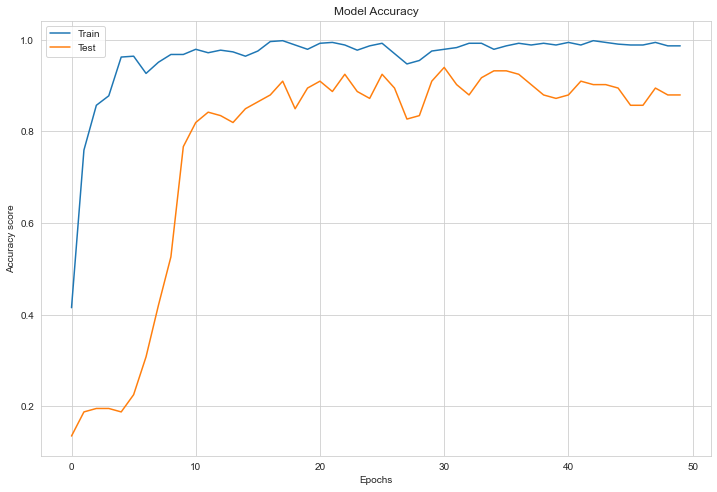

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy score')
plt.title('Model Accuracy')
plt.legend(['Train','Test'])
plt.show()

In [13]:
loss,accuracy,precision,recall=model.evaluate(x_test,y_test)

6/6 [==============================] - 1s 79ms/step - loss: 0.6379 - accuracy: 0.8623 - precision: 0.8659 - recall: 0.8503


In [14]:
import tensorflow
# This network has many hyper parameters that you have to adjust first
# The first hyperparameter gives you the freedom to choose whether to enter the final dense layer of the network or cancel it, in which case it has been cancelled.
# By specifying include_top= False we exclude the prediction layer which allows us to substitute our custom prediction layer later on.
mnet = tensorflow.keras.applications.mobilenet_v2.MobileNetV2(include_top=False, 
                                                      input_shape=(220, 220, 3),#same as of custom model
                                                      pooling='avg',
                                                      weights='imagenet')

mnet.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 220, 220, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 110, 110, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 110, 110, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 110, 110, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [15]:
model2=Sequential([
    mnet,
    Dropout(0.25),
    Dense(10,activation='softmax') # here we use 10 layers because we have to predict bewtween 10 classes
])

In [16]:
# here we freezed the layer that responsible for feature extraction
model2.layers[0].trainable = False
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                12810     
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [17]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',Precision(), Recall()])
#Here we supply our training data to the mobilenet model.
history2=model2.fit(x_train,y_train,batch_size=12, epochs=10,validation_split=0.3)

Epoch 1/10
39/39 [==============================] - 11s 254ms/step - loss: 1.7364 - accuracy: 0.3978 - precision_1: 0.7468 - recall_1: 0.1269 - val_loss: 0.8833 - val_accuracy: 0.8400 - val_precision_1: 0.9419 - val_recall_1: 0.4050
Epoch 2/10
39/39 [==============================] - 9s 237ms/step - loss: 0.6796 - accuracy: 0.8430 - precision_1: 0.9310 - recall_1: 0.6387 - val_loss: 0.4582 - val_accuracy: 0.9150 - val_precision_1: 0.9817 - val_recall_1: 0.8050
Epoch 3/10
39/39 [==============================] - 9s 238ms/step - loss: 0.3730 - accuracy: 0.9226 - precision_1: 0.9748 - recall_1: 0.8323 - val_loss: 0.3381 - val_accuracy: 0.9550 - val_precision_1: 0.9829 - val_recall_1: 0.8600
Epoch 4/10
39/39 [==============================] - 9s 237ms/step - loss: 0.2537 - accuracy: 0.9613 - precision_1: 0.9792 - recall_1: 0.9118 - val_loss: 0.2648 - val_accuracy: 0.9650 - val_precision_1: 0.9785 - val_recall_1: 0.9100
Epoch 5/10
39/39 [==============================] - 9s 238ms/step - los

6/6 [==============================] - 2s 354ms/step - loss: 0.1683 - accuracy: 0.9760 - precision_1: 0.9874 - recall_1: 0.9401


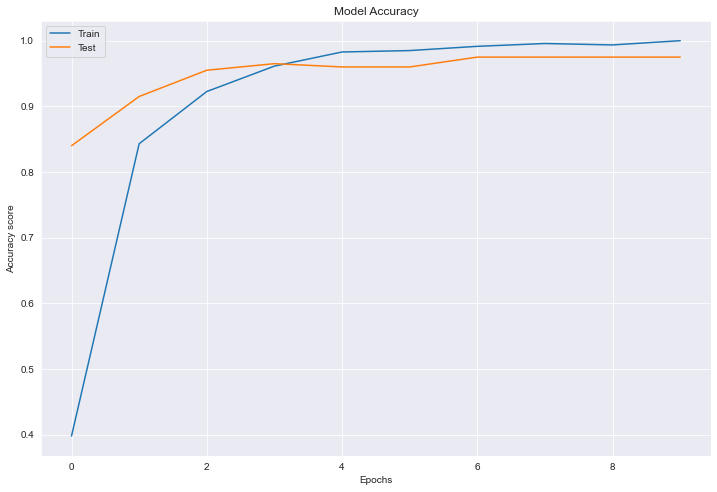

In [18]:
loss,accuracy,precision,recall=model2.evaluate(x_test,y_test)
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy score')
plt.title('Model Accuracy')
plt.legend(['Train','Test'])
plt.show()

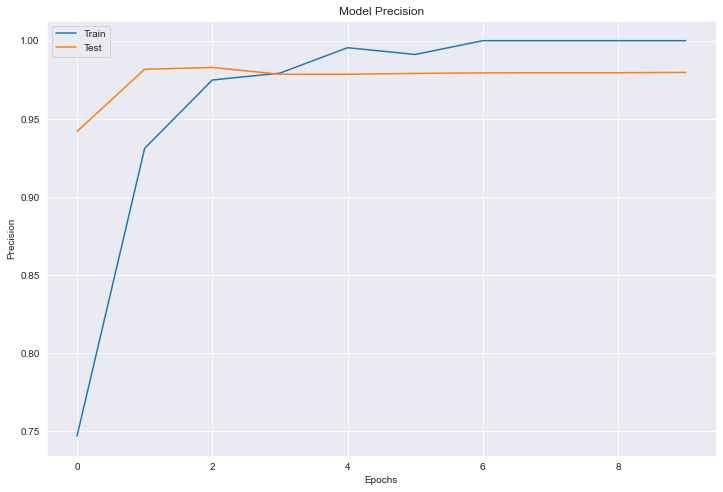

In [19]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.plot(history2.history['precision_1'])
plt.plot(history2.history['val_precision_1'])
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Model Precision')
plt.legend(['Train','Test'])
plt.show()

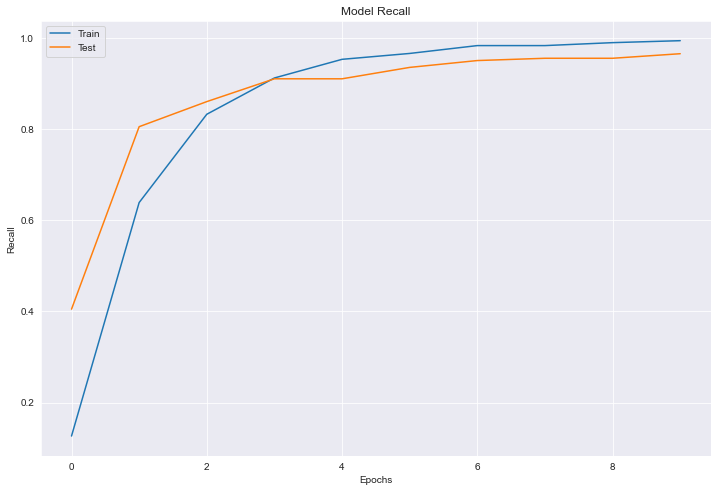

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.plot(history2.history['recall_1'])
plt.plot(history2.history['val_recall_1'])
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Model Recall')
plt.legend(['Train','Test'])
plt.show()

In [21]:
print(history2.history['accuracy'])

[0.3978494703769684, 0.8430107235908508, 0.9225806593894958, 0.9612902998924255, 0.9827957153320312, 0.9849462509155273, 0.9913978576660156, 0.9956989288330078, 0.9935483932495117, 1.0]


In [22]:
sum = 0
for x in history2.history['accuracy']:
    sum += x
    

average = sum / len(history2.history['accuracy'])
print("")
print("Average Accuracy:")
print(average)


Average Accuracy:
0.9073118299245835


In [23]:
sum = 0
for x in history2.history['recall_1']:
    sum += x
    

average = sum / len(history2.history['recall_1'])
print("")
print("Average Recall:")
print(average)


Average Recall:
0.8376344084739685


In [24]:
sum = 0
for x in history2.history['precision_1']:
    sum += x
    

average = sum / len(history2.history['precision_1'])
print("")
print("Average Precision:")
print(average)


Average Precision:
0.961857146024704
